In [ ]:
# load responses.json

import json

with open('responses.json') as f:
    data = json.load(f)

print(data)

In [2]:
# group data by participantId

participants = {}

for response in data:
    participantId = response['participantId']
    if participantId not in participants:
        participants[participantId] = []
    participants[participantId].append(response)

# filter out participants with at least 5 responses

participants = {k: v for k, v in participants.items() if len(v) >= 5}

# make into array

scores = list(participants.values())
scores = [score for participant in scores for score in participant]


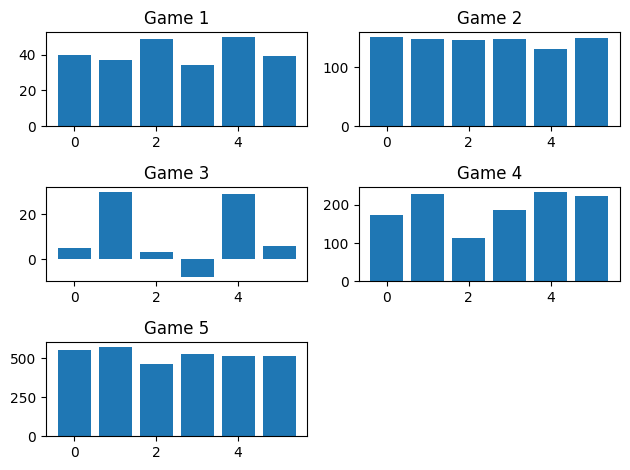

In [3]:
# plot scores

import matplotlib.pyplot as plt

for i in range(5):
  gameScores = [score['score'] for score in scores if score['gameNumber'] == i]

  # subplot
  plt.subplot(3, 2, i+1)
  # bar charts
  plt.bar(range(len(gameScores)), gameScores)
  # title
  plt.title('Game ' + str(i+1))
  # make title fit
  plt.tight_layout()
  

plt.show()
